In [6]:
import pandas as pd

# Load dataset (replace with your local path)
file_path = 'Sample - Superstore.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')  # Handles special characters

# Show basic info
print(df.head())
print(df.columns)

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [7]:
#Data cleaning
print(df.isnull().sum())

# Fill missing numerical values with 0 (if any)
df.fillna(0, inplace=True)

# Convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Check data types
print(df.dtypes)

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64
Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date                object
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity    

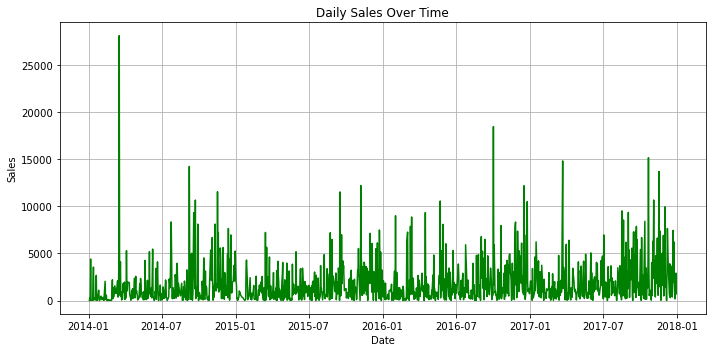

In [11]:
#Time-Series Analysis (Sales over Time)
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('Sample - Superstore.csv', encoding='ISO-8859-1')

# Convert to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Ensure 'Sales' is numeric
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')

# Group by Order Date and sum Sales
daily_sales = df.groupby('Order Date')['Sales'].sum()

# Sort by date
daily_sales = daily_sales.sort_index()

# Convert index and values explicitly to numpy arrays
dates = daily_sales.index.to_numpy()
sales = daily_sales.values  # or .to_numpy()

# Plot using numpy arrays
plt.figure(figsize=(10, 5))
plt.plot(dates, sales, color='green')
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
#Summary Cards(Total Sales, Profit, etc.)

total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
total_orders = df['Order ID'].nunique()
    
print(f"Total Sales: ${total_sales:,.2f}")

print(f"Total Profit: ${total_profit:,.2f}")
print(f"Total Orders: {total_orders}")

Total Sales: $2,297,200.86
Total Profit: $286,397.02
Total Orders: 5009


In [19]:
# Filter data for a specific Region
region = 'West'
df_region = df[df['Region'] == region]
print(df_region.head())

   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
2       3  CA-2016-138688 2016-06-12  6/16/2016    Second Class    DV-13045   
5       6  CA-2014-115812 2014-06-09  6/14/2014  Standard Class    BH-11710   
6       7  CA-2014-115812 2014-06-09  6/14/2014  Standard Class    BH-11710   
7       8  CA-2014-115812 2014-06-09  6/14/2014  Standard Class    BH-11710   
8       9  CA-2014-115812 2014-06-09  6/14/2014  Standard Class    BH-11710   

     Customer Name    Segment        Country         City  ... Postal Code  \
2  Darrin Van Huff  Corporate  United States  Los Angeles  ...       90036   
5  Brosina Hoffman   Consumer  United States  Los Angeles  ...       90032   
6  Brosina Hoffman   Consumer  United States  Los Angeles  ...       90032   
7  Brosina Hoffman   Consumer  United States  Los Angeles  ...       90032   
8  Brosina Hoffman   Consumer  United States  Los Angeles  ...       90032   

   Region       Product ID         Category Sub-Category